# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#We import matplotlib as it will be required later on in the porject.
# We import data and create the DataFrame under the variable ds, we identify values are separated by ; and the first column as an index to avoid unnamed column.
ds = pd.read_csv('assets/real_estate.csv', sep=';', index_col=[0])

# we visualize the dataframe.
ds

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# We identify the index of the maximum value in the column Price and obtain the whole row.
max_value = ds.loc[ds['price'].idxmax()]

print(f"La casa con dirección en {max_value['address']} es la más cara y su precio es de {max_value['price']} €")

La casa con dirección en El Escorial es la más cara y su precio es de 8500000 €


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
#We detected values equal to 0, we filter to values above 0.
ds_ok = ds[ds['price'] > 0]

# We identify the index of the minimum value in the column Price and obtain the whole row.
min_value = ds_ok.loc[ds_ok['price'].idxmin()]

print(f"La casa con dirección en {min_value['address']} es la más barata y su precio es de {min_value['price']} €")

La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 €


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
# We identify the index of the minimum and maximum surfaces in the column surface and obtain the whole row.
max_surface = ds_ok.loc[ds_ok['surface'].idxmax()]
min_surface = ds_ok.loc[ds_ok['surface'].idxmin()]

# We convert the surface value to int to avoid obtaining the .0 after the value of the surface.
max_surface_int = int(max_surface['surface'])
min_surface_int = int(min_surface['surface'])

print(f"La casa más grande está ubicada en {max_surface['address']} y su superficie es de {max_surface_int} metros")
print(f"La casa más pequeña está ubicada en {min_surface['address']} y su superficie es de {min_surface_int} metros")


La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
# We obtain the level5 unique values and join them with "," to display them.
populations = ', '.join(ds_ok['level5'].unique())

print(populations)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
# We create a boolean variable for the NAs.
boolean_nas = pd.isna(ds_ok)

print(boolean_nas)

       id_realEstates  isNew  realEstate_name  phone_realEstate  url_inmueble  \
1               False  False            False             False         False   
2               False  False            False             False         False   
3               False  False            False             False         False   
4               False  False            False             False         False   
5               False  False            False             False         False   
...               ...    ...              ...               ...           ...   
15331           False  False            False             False         False   
15332           False  False            False             False         False   
15333           False  False            False             False         False   
15334           False  False            False             False         False   
15335           False  False            False             False         False   

       rooms  bathrooms  su

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
#We count how many NAs and NoNAs exist in each column to determine which columns are completely unnecessary.
na_count = ds_ok.isna().sum()
nona_count = ds_ok.notna().sum()

for column in ds_ok.columns:
    print(f"{column}: {na_count[column]} NAs, {nona_count[column]} NoNAs")

id_realEstates: 0 NAs, 15275 NoNAs
isNew: 0 NAs, 15275 NoNAs
realEstate_name: 10 NAs, 15265 NoNAs
phone_realEstate: 789 NAs, 14486 NoNAs
url_inmueble: 0 NAs, 15275 NoNAs
rooms: 350 NAs, 14925 NoNAs
bathrooms: 339 NAs, 14936 NoNAs
surface: 1245 NAs, 14030 NoNAs
price: 0 NAs, 15275 NoNAs
date: 0 NAs, 15275 NoNAs
description: 142 NAs, 15133 NoNAs
address: 0 NAs, 15275 NoNAs
country: 0 NAs, 15275 NoNAs
level1: 0 NAs, 15275 NoNAs
level2: 0 NAs, 15275 NoNAs
level3: 0 NAs, 15275 NoNAs
level4: 6632 NAs, 8643 NoNAs
level5: 0 NAs, 15275 NoNAs
level6: 14570 NAs, 705 NoNAs
level7: 2265 NAs, 13010 NoNAs
level8: 8530 NAs, 6745 NoNAs
upperLevel: 0 NAs, 15275 NoNAs
countryId: 0 NAs, 15275 NoNAs
level1Id: 0 NAs, 15275 NoNAs
level2Id: 0 NAs, 15275 NoNAs
level3Id: 0 NAs, 15275 NoNAs
level4Id: 0 NAs, 15275 NoNAs
level5Id: 0 NAs, 15275 NoNAs
level6Id: 0 NAs, 15275 NoNAs
level7Id: 0 NAs, 15275 NoNAs
level8Id: 0 NAs, 15275 NoNAs
accuracy: 0 NAs, 15275 NoNAs
latitude: 0 NAs, 15275 NoNAs
longitude: 0 NAs, 1527

In [8]:
# We erase the last two columns for the have only NAs and the column level6 which 95% of the data is NAs.
new_ds = ds_ok.drop(["zipCode","customZone","level6"], axis=1)

#We erase the rest of the lists with any NA values, had we done it before, it would have erased all the data because of the last two columns. Or 95% of the data due to level6 column.
drop_new_ds = new_ds.dropna()

# We define the shape of the original size, without the thre useless columns and the latest.
size_before = ds.shape
size_after = new_ds.shape
last_size = drop_new_ds.shape

print(f'Original size: {size_before} size after removing what we consider, useless columns: {size_after} and after removing all the rows with an NA value, the shape is: {last_size}')
print(f'We will continue the project working with the dataset new_ds which seems to keep the data we require for the rest of the project')

Original size: (15335, 36) size after removing what we consider, useless columns: (15275, 33) and after removing all the rows with an NA value, the shape is: (110, 33)
We will continue the project working with the dataset new_ds which seems to keep the data we require for the rest of the project


#### Ejercicio 07. ¿Cuál es la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [9]:
# We filter by the rows that have the value "Arroyomolinos (Madrid)" in column "level5".
am_ds = new_ds[new_ds["level5"] == "Arroyomolinos (Madrid)"]

# We obtain the mean from the values in column price from the filtered values in Arroyomolinos (Madrid) and we limited the result to showing 2 decimals.
mean_am_ds = round(am_ds["price"].mean(), 2)

print(f"The mean of the values in Arroyomolinos (Madrid) is : {mean_am_ds} €")



The mean of the values in Arroyomolinos (Madrid) is : 298905.18 €


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


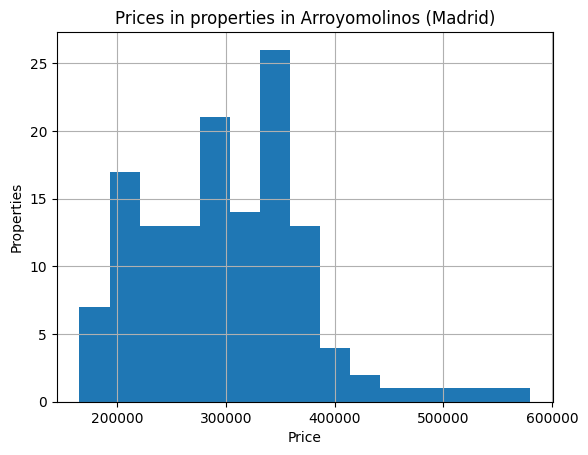

In [10]:
#We set the histogram variable for the property prices.
am_ds_histogram = am_ds["price"].hist(bins=15)

#We define its title and labels.
plt.title('Prices in properties in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Properties')

plt.show(am_ds_histogram)



We observe right-skewed distribution, where there is a clear accumulation of properties with prices between 200.000 € and 400.000 €, and peaks at values closer to 200.000 €, 300.000 €, and 340.000 €. We notice a few properties with values around 570.000 €, however those being exclusive and out of the norm in this area.  

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [11]:
# We create the variables for the dataframe with the Valdemorillo values and Galapagar.
vd_ds = new_ds[new_ds["level5"] == "Valdemorillo"]
gp_ds = new_ds[new_ds["level5"] == "Galapagar"]

# We calculate the mean and median to obtain a clearer understanding of the what the average information is disclosing.
mean_vd_ds = round(vd_ds["price"].mean(),2)
median_vd_ds = round(vd_ds["price"].median(),2)

mean_gp_ds = round(gp_ds["price"].mean(),2)
median_gp_ds = round(gp_ds["price"].median(),2)


print(f"The price average in Valdemorillo is {mean_vd_ds}, while in Galapagar is {mean_gp_ds}")
print(f"The price median in Valdemorillo is {median_vd_ds}, while in Galapagar is {median_gp_ds}")


The price average in Valdemorillo is 363860.29, while in Galapagar is 360063.2
The price median in Valdemorillo is 324500.0, while in Galapagar is 350000.0


We observe that the house pricing for Galapagar and Valdemorillo are quite similar. Interestingly enough, we detect how the Valdemorillo median is smaller while its average is bigger than galapagar's, which suggests that there are a few very expensive properties in Valdemorillo that significantly raise its average price.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [12]:
# We make sure there are no NA values on surfaces column to avoid receiving unexpected values in the pps column. 
new_ds = new_ds.dropna(subset=["surface"])

# We generate the new column in the new_ds.
new_ds["pps"] = new_ds["price"]/new_ds["surface"]

# We call again the variable for the vd_ds and gp_ds to include the pps columns and update the info.
vd_ds = new_ds[new_ds["level5"] == "Valdemorillo"]
gp_ds = new_ds[new_ds["level5"] == "Galapagar"]

# We calculate the average per square meter for Valdemorillo and Galapagar.
avg_vd_ds = round(vd_ds["pps"].mean(),2)
avg_gp_ds = round(gp_ds["pps"].mean(),2)


print(f'The price per square meter in Valdemorillo is {avg_vd_ds} €, and in Galapagar is: {avg_gp_ds} €')


The price per square meter in Valdemorillo is 1317.95 €, and in Galapagar is: 1606.32 €


We observe a clear difference in price per square meter. In Valdemorillo, the price per square meter is cheaper. Looking back at the previous information regarding the average price, the houses in Valdemorillo are likely to be bigger than in Galapagar.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

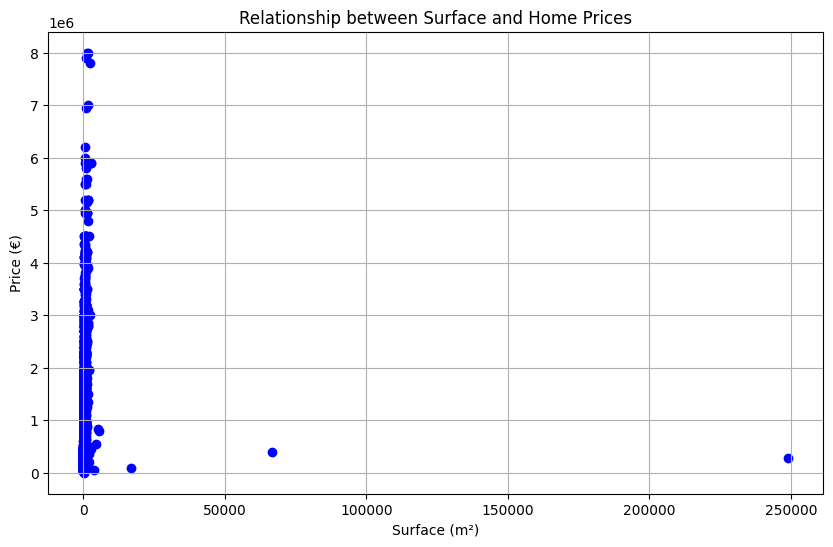

In [13]:
# We select the size of the scatter plot figures, as well as the axis for the surface and the price house.
plt.figure(figsize=(10, 6))
plt.scatter(new_ds['surface'], new_ds['price'], color='blue')
plt.title('Relationship between Surface and Home Prices')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()

We cannot obtain a clear result from this scatter plot, for clearly the price (y axis) is not being represented correctly. Assuming the scatter plot is correct and we observe how most of the houses appear to have relatively small surface areas (close to zero) compared to the few outliers with very large surface areas. This suggests that typical houses fall within a smaller range of surface areas, while there are a few properties with exceptionally large areas.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [14]:
# We select the original dataset to make sure we don't miss any agencies. We drop any NA in the realEstate_name column.
clean_ds = ds.dropna(subset=["realEstate_name"])

# We turn the column into a set to get rid of duplicates. 
unique_clean_ds = set(clean_ds["realEstate_name"])

# We obtain the number of items in the set, which is the number of real estate agencies.
real_estates_count = len(unique_clean_ds)

print(real_estates_count)

1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [15]:
# We understand that each time the "poblacion" appears, counts as one house, therefore we find which "poblacion" repeats itself more times in the column.
count_poblacion = ds['level5'].value_counts()
poblacion_max = count_poblacion.idxmax()
number_houses = count_poblacion.max()

print(f"The place with more houses is:{poblacion_max}, with {number_houses} houses in their zone.")

The place with more houses is: Madrid Capital, with 6643 houses in their zone.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [16]:
# We make a dataframe called cinturon sur.
cinturon_sur_list = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

cinturon_sur_ds = new_ds[new_ds["level5"].isin(cinturon_sur_list)]

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

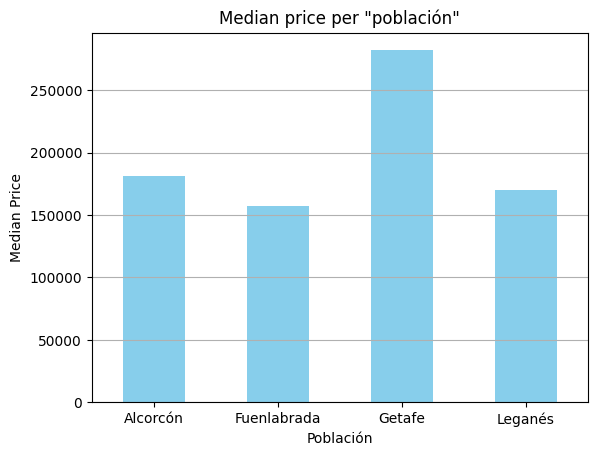

In [17]:
# We groupby the "poblaciones" and calculate its median by "price".
cinturon_sur_median_prices = cinturon_sur_ds.groupby("level5")["price"].median()

# We plot the bar graphic in skyblue color, add the title, labels, adjust the rotation of the label in x and add a grid on the y axis.
cinturon_sur_median_prices.plot(kind='bar', color='skyblue')
plt.title('Median price per "población"')
plt.xlabel('Población')
plt.ylabel('Median Price')
plt.xticks(rotation=0)
plt.grid(axis='y')

# show the graph.
plt.show()

When looking at the graph we understand that Getafe has the highest median price, while Fuenlabrada has the lowest. However, Alcorcón, Fuenlabrada and Leganés have a very similar price, which differs from Getafe, which price is way above the rest.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [18]:
# We calculate the mean and variance for the price of cinturon_sur and round it to the last 2 decimals.
price_cs_mean = round(cinturon_sur_ds["price"].mean(),2)
price_cs_var = round(cinturon_sur_ds["price"].var(),2)

# We calculate the mean and variance for the number of rooms of cinturon_sur and round it to the last 2 decimals.
rooms_cs_mean = round(cinturon_sur_ds["rooms"].mean(),2)
rooms_cs_var = round(cinturon_sur_ds["rooms"].var(),2)

# We calculate the mean and variance for the surface in houses of cinturon_sur and round it to the last 2 decimals.
surface_cs_mean = round(cinturon_sur_ds["surface"].mean(),2)
surface_cs_var = round(cinturon_sur_ds["surface"].var(),2)

# We calculate the mean and variance for the number of bathrooms of cinturon_sur and round it to the last 2 decimals.
bathrooms_cs_mean = round(cinturon_sur_ds["bathrooms"].mean(),2)
bathrooms_cs_var = round(cinturon_sur_ds["bathrooms"].var(),2)

print(f'The mean for the price in the Cinturon Sur is: {price_cs_mean} with a variance of: {price_cs_var}')
print(f'The mean for the number of rooms in the Cinturon Sur is: {rooms_cs_mean} with a variance of: {rooms_cs_var}')
print(f'The mean for the houses surface in the Cinturon Sur is: {surface_cs_mean} with a variance of: {surface_cs_var}')
print(f'The mean for the bathrooms in the Cinturon Sur is: {bathrooms_cs_mean} with a variance of: {bathrooms_cs_var}')

The mean for the price in the Cinturon Sur is: 225446.68 with a variance of: 14625529767.26
The mean for the number of rooms in the Cinturon Sur is: 3.01 with a variance of: 0.71
The mean for the houses surface in the Cinturon Sur is: 111.3 with a variance of: 4275.92
The mean for the bathrooms in the Cinturon Sur is: 1.63 with a variance of: 0.58


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [19]:
# We identify the index of the maximum value, grouped by poblacion (level5) and obtain the whole row.
cinturon_sur_max_properties = cinturon_sur_ds.loc[cinturon_sur_ds.groupby("level5")["price"].idxmax()]

# We iterate over the rows in the dataframe 
for index, row in cinturon_sur_max_properties.iterrows():
    print(f"The house with address: {row['address']} is the most expensive in {row['level5']} and its price is: {row['price']} €")


The house with address: Alcorcón is the most expensive in Alcorcón and its price is: 950000 €
The house with address: Calle de Paulo Freire, 5, Fuenlabrada is the most expensive in Fuenlabrada and its price is: 490000 €
The house with address: Getafe is the most expensive in Getafe and its price is: 1050000 €
The house with address: Avenida Reina Sofía, Leganés is the most expensive in Leganés and its price is: 650000 €


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_4097/352745002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur_ds.loc[:, 'normalized_price'] = cinturon_sur_ds.groupby('level5')['price'].transform(normalize)


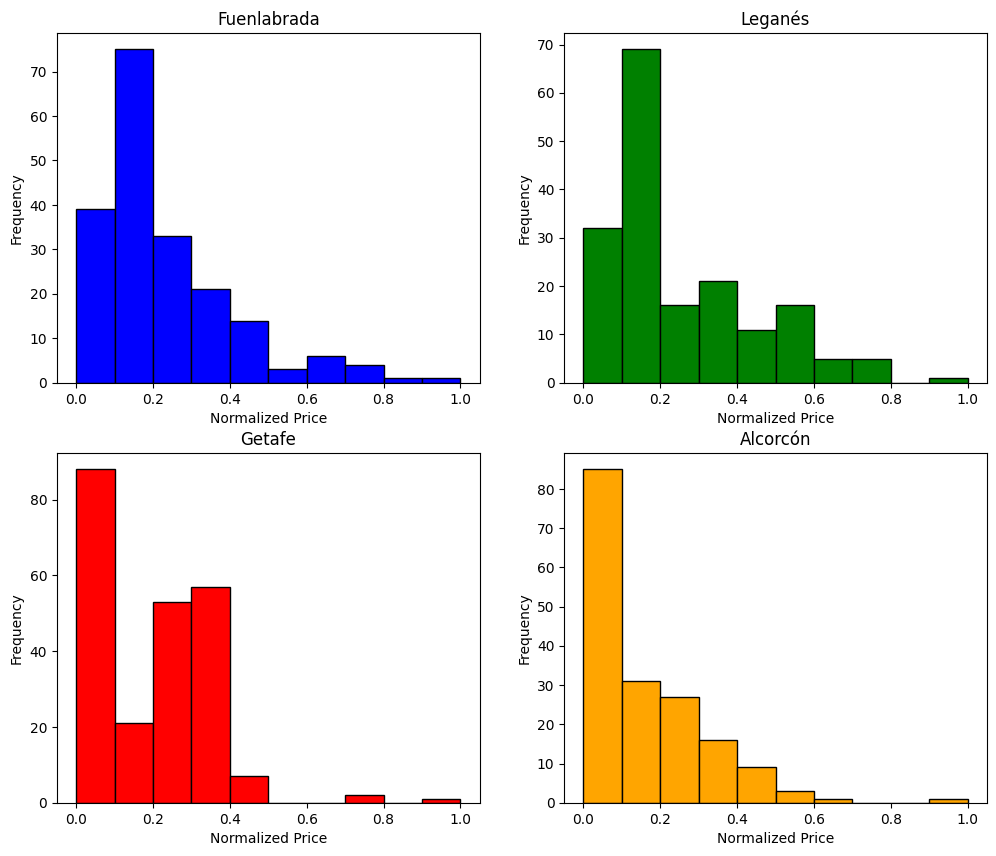

In [20]:
# We decide the methodology to normalising, we will do a min-max scaling. [(current value - min value) / (max value - min value)]
def normalize(value):
    return (value - value.min()) / (value.max() - value.min())

# We apply a temporary normalization to the cinturon_sur and get the data in a new column Normalized_Price. We use groupby to isolate each normalization for level5 value.
cinturon_sur_ds.loc[:, 'normalized_price'] = cinturon_sur_ds.groupby('level5')['price'].transform(normalize)

# We define the number of subplots, its organisation and the size of the histograms.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histogram for Fuenlabrada, set its color to blue.
data_fuenlabrada = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Fuenlabrada"]
axes[0, 0].hist(data_fuenlabrada['normalized_price'], bins=10, color='blue', edgecolor='black')
axes[0, 0].set_title('Fuenlabrada')
axes[0, 0].set_xlabel('Normalized Price')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for Leganés, set its color to green.
data_leganes = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Leganés"]
axes[0, 1].hist(data_leganes['normalized_price'], bins=10, color='green', edgecolor='black')
axes[0, 1].set_title('Leganés')
axes[0, 1].set_xlabel('Normalized Price')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for Getafe, set its color to red.
subset_getafe = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Getafe"]
axes[1, 0].hist(subset_getafe['normalized_price'], bins=10, color='red', edgecolor='black')
axes[1, 0].set_title('Getafe')
axes[1, 0].set_xlabel('Normalized Price')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for Alcorcón, set its color to orange.
subset_alcorcon = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Alcorcón"]
axes[1, 1].hist(subset_alcorcon['normalized_price'], bins=10, color='orange', edgecolor='black')
axes[1, 1].set_title('Alcorcón')
axes[1, 1].set_xlabel('Normalized Price')
axes[1, 1].set_ylabel('Frequency')

plt.show()




We identify a common tendecy with the skewness, all of them being right-skewed, indicating that most of the properties have prices towards the lower end of the normalized price scale. Therefore, diplaying that lower-priced properties are more common in these areas.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [21]:
# We use the new_ds dataframe we used earlier to calculate the pps, and generate the variables gt and al.
gt_ds = new_ds[new_ds["level5"] == "Getafe"]
al_ds = new_ds[new_ds["level5"] == "Alcorcón"]

# We calculate the average per square meter for Getafe and Alcorcón.
avg_gt_ds = round(gt_ds["pps"].mean(),2)
avg_al_ds = round(al_ds["pps"].mean(),2)


print(f'The average price per square meter in Getafe is {avg_gt_ds} €, and in Alcorcón is: {avg_al_ds} €')

The average price per square meter in Getafe is 2174.59 €, and in Alcorcón is: 2239.3 €


When comparing the square meter price in Getafe and Alcorcón with Valdemorillo and Galapagar, it is evident that prices are significantly higher. This indicates a higher demand in these areas, likely due to greater development and closer proximity to urban centers.

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

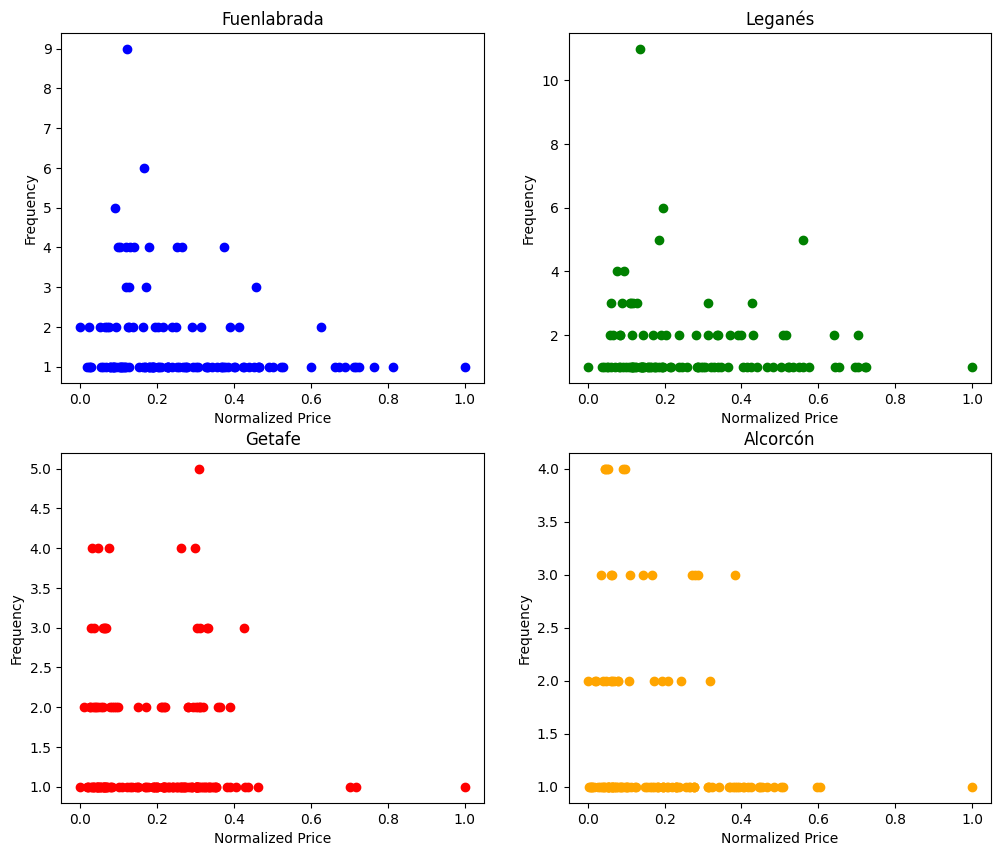

In [22]:


# We define the number of subplots, its organisation and the size of the scatter plots.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# We calculate the frequency for Fuenlabrada and create a scatter plot, set its color to blue.
data_fuenlabrada = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Fuenlabrada"]
freq_fuenlabrada = data_fuenlabrada['normalized_price'].value_counts().reset_index()
freq_fuenlabrada.columns = ['normalized_price', 'frequency']
axes[0, 0].scatter(freq_fuenlabrada['normalized_price'], freq_fuenlabrada['frequency'], color='blue')
axes[0, 0].set_title('Fuenlabrada')
axes[0, 0].set_xlabel('Normalized Price')
axes[0, 0].set_ylabel('Frequency')

# We calculate the frequency for Leganés and create a scatter plot, set its color to green.
data_leganes = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Leganés"]
freq_leganes = data_leganes['normalized_price'].value_counts().reset_index()
freq_leganes.columns = ['normalized_price', 'frequency']
axes[0, 1].scatter(freq_leganes['normalized_price'], freq_leganes['frequency'], color='green')
axes[0, 1].set_title('Leganés')
axes[0, 1].set_xlabel('Normalized Price')
axes[0, 1].set_ylabel('Frequency')

# We calculate the frequency for Getafe and create a scatter plot, set its color to red.
data_getafe = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Getafe"]
freq_getafe = data_getafe['normalized_price'].value_counts().reset_index()
freq_getafe.columns = ['normalized_price', 'frequency']
axes[1, 0].scatter(freq_getafe['normalized_price'], freq_getafe['frequency'], color='red')
axes[1, 0].set_title('Getafe')
axes[1, 0].set_xlabel('Normalized Price')
axes[1, 0].set_ylabel('Frequency')

# We calculate the frequency for Alcorcón and create a scatter plot, set its color to orange.
data_alcorcon = cinturon_sur_ds[cinturon_sur_ds['level5'] == "Alcorcón"]
freq_alcorcon = data_alcorcon['normalized_price'].value_counts().reset_index()
freq_alcorcon.columns = ['normalized_price', 'frequency']
axes[1, 1].scatter(freq_alcorcon['normalized_price'], freq_alcorcon['frequency'], color='orange')
axes[1, 1].set_title('Alcorcón')
axes[1, 1].set_xlabel('Normalized Price')
axes[1, 1].set_ylabel('Frequency')

plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [23]:
# We include CircleMarker and Polyline for we need them to display the information in the map
from ipyleaflet import Map, basemaps,  CircleMarker, Polyline

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
center = [60, -2.2]
zoom = 2
map = Map(center = center, zoom = zoom, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Esri.WorldTopoMap)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [24]:
# We readjust the zoom and location to give a closer look.
center = [40.31 , -3.7]
zoom =  12
map = Map(center = center, zoom = zoom, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Esri.WorldTopoMap)

# We check there are no NA values or 0 values.
cinturon_sur_ds = cinturon_sur_ds.dropna(subset=['latitude', 'longitude'])
cinturon_sur_ds = cinturon_sur_ds[(cinturon_sur_ds['latitude'] != 0) & (cinturon_sur_ds['longitude'] != 0)]

# We substitute the "," for ".", and avoid errors for running the same code again.
if cinturon_sur_ds['latitude'].dtype == 'object':
    cinturon_sur_ds['latitude'] = cinturon_sur_ds['latitude'].str.replace(',', '.').astype(float, errors='ignore')

if cinturon_sur_ds['longitude'].dtype == 'object':
    cinturon_sur_ds['longitude'] = cinturon_sur_ds['longitude'].str.replace(',', '.').astype(float, errors='ignore')

# We create the dictionary to introduce the coordinates.
coordinates = {}

# We create a loop to add the data into the dicctionary, keeping in mind we will have multiple values for the same key.
for index, row in cinturon_sur_ds.iterrows():
    poblacion = row['level5']
    latitude = row['latitude']
    longitude = row['longitude']
    if poblacion not in coordinates:
        coordinates[poblacion] = []
    coordinates[poblacion].append((latitude, longitude))

# Print the dictionary content to confirm it was added correctly.
print(coordinates)

# Color dictionary for each poblacion.
color_dict = {
    'Fuenlabrada': 'blue',
    'Leganés': 'green',
    'Getafe': 'red',
    'Alcorcón': 'purple'
}

# We add circles on each location, with the colour of its respective poblacion. If there is data with different information from our color_dict, it will display it in black.
for poblacion, coords_list in coordinates.items():
    color = color_dict.get(poblacion, 'black')
    for coords in coords_list:
        circle_marker = CircleMarker(
            location=coords,
            radius=5,  
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            title=poblacion
        )
        map.add_layer(circle_marker)

    # We connect the dots for their locations with the same color.
    polyline = Polyline(
        locations=coords_list,
        color=color,  
        weight=1,
        opacity=1
    )
    map.add_layer(polyline)

# We display the map.
map

{'Fuenlabrada': [(40.2853785786438, -3.79508142135624), (40.2744807718156, -3.79192471504211), (40.2906814213562, -3.80405242135624), (40.3152529585, -3.8365174323), (40.2921796, -3.815865), (40.29224, -3.83833), (40.31381, -3.83733), (40.29742, -3.80916), (40.3133562, -3.8360052), (40.27782, -3.80908), (40.2919082135624, -3.82411851356237), (40.31381, -3.83733), (40.2889244, -3.7985458), (40.2837261, -3.7907629), (40.2823585, -3.8061052), (40.2830905213562, -3.80549367864376), (40.296075, -3.80790299999994), (40.2772542, -3.7907283), (40.296075, -3.80790299999994), (40.2772542, -3.7907283), (40.2915427786438, -3.79755132135624), (40.28293, -3.80959), (40.29338, -3.82598), (40.2871968, -3.7917573), (40.2890264864376, -3.81057698643763), (40.2833037, -3.78627316), (40.288330005557, -3.7994911074191), (40.288095391725, -3.8000407415556), (40.28651, -3.78329), (40.2877, -3.80104), (40.29987, -3.80874), (40.27609356, -3.80152655), (40.29287, -3.79943), (40.2758248, -3.7999498), (40.2888528

Map(center=[40.31, -3.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…